In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt

In [47]:
with open("v2411_all_g.json", "r") as f:
    v2411=json.load(f)

In [13]:
G=nx.DiGraph()

In [16]:
G.add_node("0000_bidssrc")
child=["0000_bidssrc"]
c = 0
while len(child)!=0:
    c += 1
    if c == 4: break
    root=child[0]
    print(root)
    for node in v2411[:]:
        if root in node["imports"]:
            node_name=node["name"]
            child.append(node_name)
            G.add_node(node_name)
            G.add_edge(root,node_name)
    _=child.pop(0)   

0000_bidssrc
0116_bids_info
0117_anat_ref_dimensions


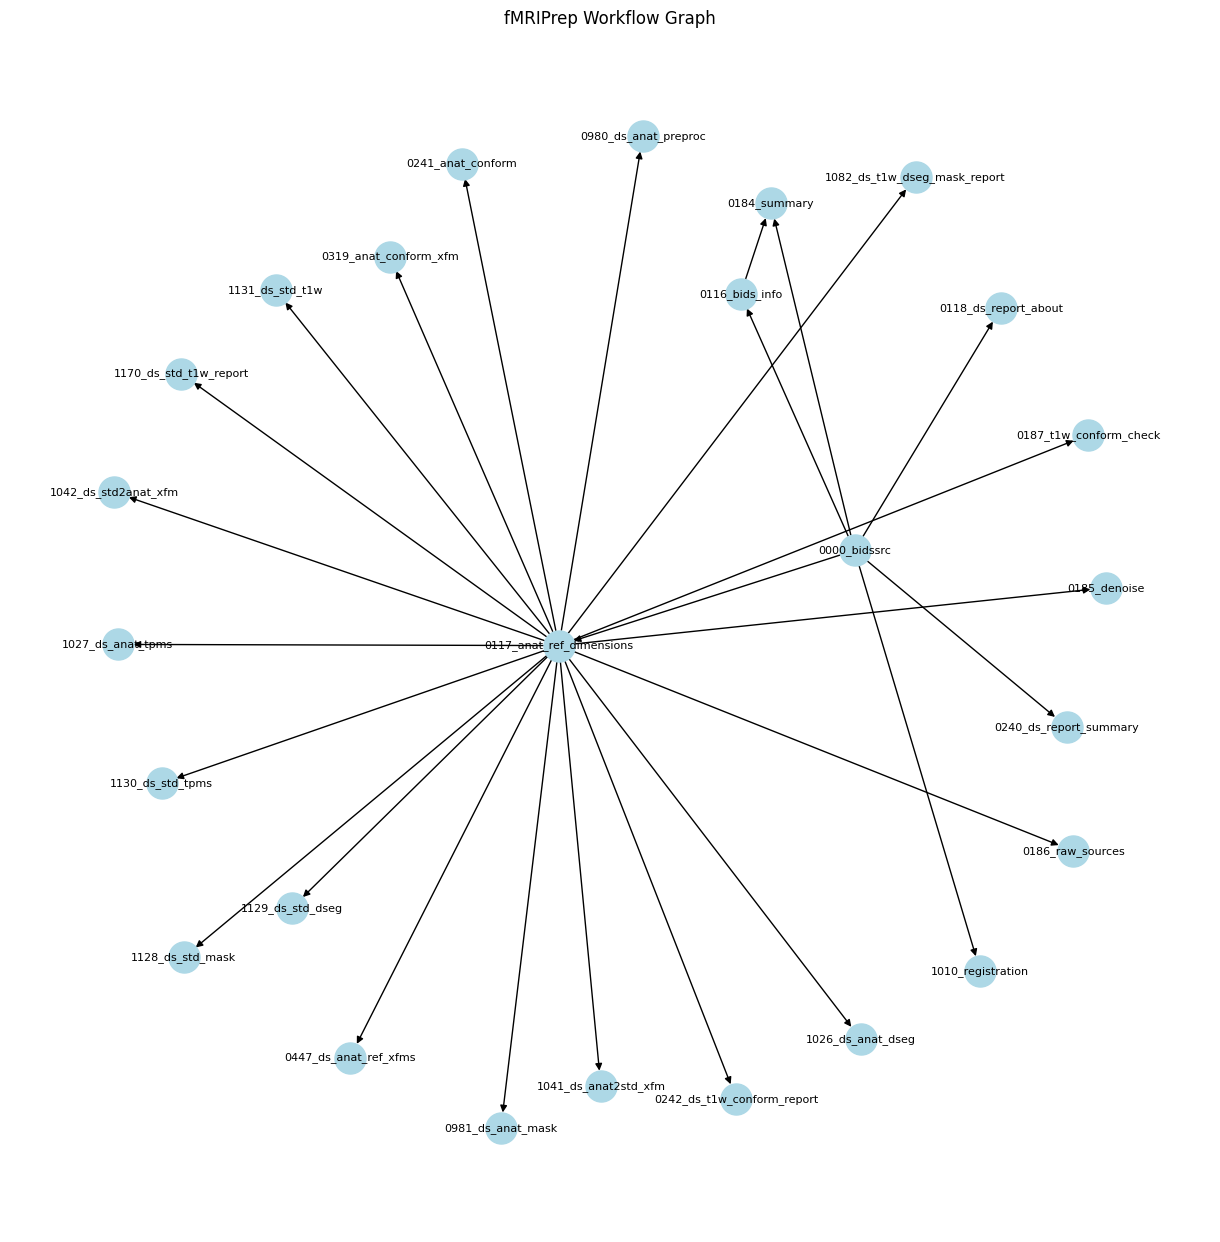

In [17]:
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_size=500, node_color='lightblue', font_size=8)
plt.title("fMRIPrep Workflow Graph")
plt.show()

In [49]:
from nipype import Node, Workflow
from nipype.interfaces.utility import IdentityInterface

dummy_interface = IdentityInterface(fields=["1"])
wf = Workflow(name="start")
all_nodes={}

# G.add_node("0000_bidssrc")
root_name="0000_bidssrc"
child=[root_name]
root_node=Node(dummy_interface,name=root_name)
all_nodes[root_name]=root_node

c = 0
while len(child)!=0:
    if c == 3: break
    
    if c!= 0:
        root_name=child[0]
        if root_name not in all_nodes.keys():
            root_node=Node(dummy_interface,name=root_name)
            all_nodes[root_name]=root_node
        else:
            root_node=all_nodes[root_name]
        

    for node in v2411[:]:
        
        if root_name in node["imports"]:
            node_name=node["name"]
            child.append(node_name)
            
            if node_name not in all_nodes.keys():
                child_node=Node(dummy_interface,name=node_name)
                all_nodes[node_name]=child_node
                wf.connect(root_node,root_name,child_node,node_name)
            else:
                child_node=all_nodes[node_name]
                wf.connect(root_node,root_name,child_node,node_name+"c")

            
    _=child.pop(0)  
    c += 1


In [41]:
print("\n" + str(child))


[]


250424-15:08:25,649 nipype.workflow INFO:
	 Generated workflow graph: /Users/ibrayyilmaz/Desktop/EnkaviLab/practice_code/graph_jsons/graph_orig.png (graph2use=flat, simple_form=True).


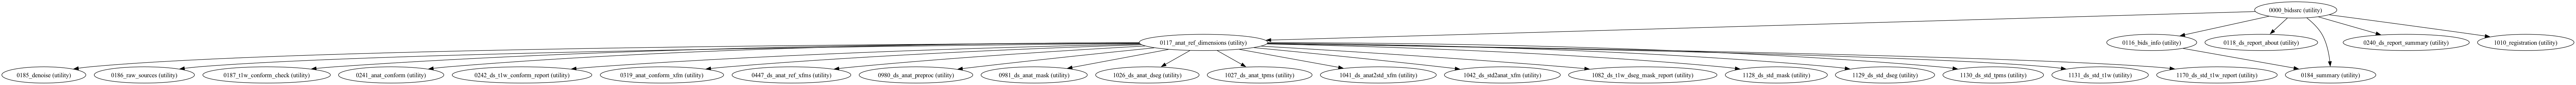

In [ ]:
# bidssrc=Node(dummy_interface,name="0000_bidssrc")
# child=Node(dummy_interface,name="child0")
# wf = Workflow(name="start")

# wf.connect(bidssrc,"0000_bidssrc", child,"child0")
with open("graph_orig.dot", "r") as f:
    lines = f.readlines()

with open("graph_orig_clean.dot", "w") as f:
    for line in lines:
        f.write(line.replace(" (utility)", ""))
wf.write_graph(graph2use='flat', dotfilename='graph_orig.dot')

from IPython.display import Image
Image(filename="graph_orig.png")